关于 SVM 的直观理解，可参看：https://www.youtube.com/watch?v=3liCbRZPrZA

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('ex2data1.txt',
                   header=None,
                   names=['Exam 1', 'Exam 2', 'Admitted'])

data2 = pd.read_csv('ex2data2.txt',
                    header=None,
                    names=['Test 1', 'Test 2', 'Accepted'])


def get_Xy(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1]
    return X, y


def learn_svc(df,C=6, k='rbf'):
    X, y = get_Xy(df)
    svc = SVC(C=C, kernel=k)
    svc.fit(X, y)
    pre_y = svc.predict(X)
    accuracy = accuracy_score(y, pre_y)
    return svc, accuracy

accuracy of data 1 is 0.98
accuracy of data 2 is 0.847457627118644


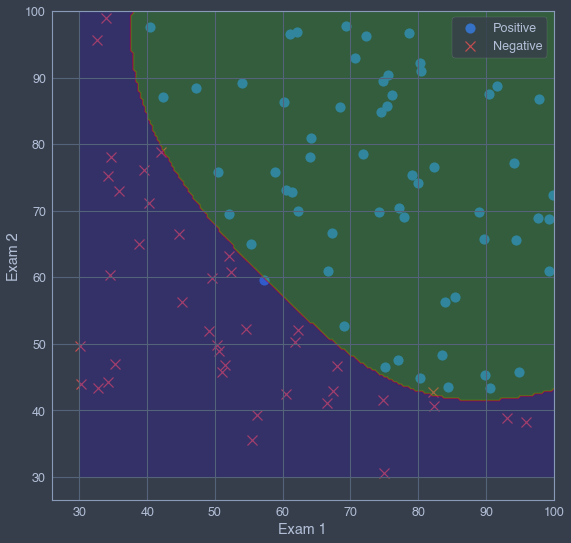

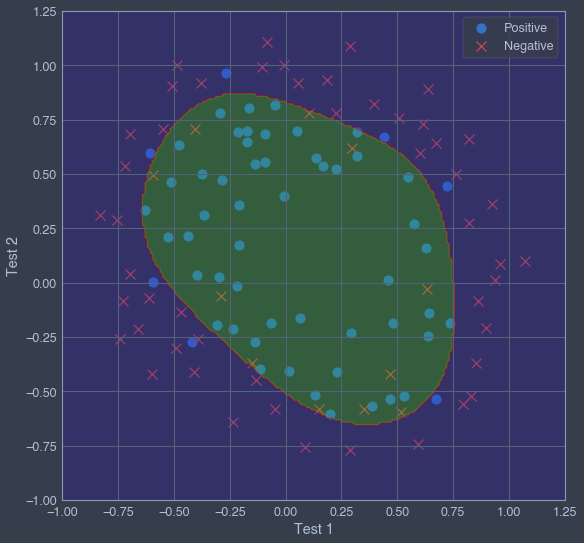

In [61]:
def plot_dataset(df):
    positive = df[df.iloc[:, -1] == 1]
    negative = df[df.iloc[:, -1] == 0]
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.scatter(positive.iloc[:, 0],
               positive.iloc[:, 1],
               color='b',
               marker='o',
               s=100,
               label='Positive')
    ax.scatter(negative.iloc[:, 0],
               negative.iloc[:, 1],
               color='r',
               marker='x',
               s=100,
               label='Negative')
    ax.legend()
    ax.set_xlabel(df.columns[0])
    ax.set_ylabel(df.columns[1])


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X)
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)


svc_data, acc_1 = learn_svc(data, C=6)
svc_data2, acc_2 = learn_svc(data2, C=6)  # default kernel is 'rbf'
print('accuracy of data 1 is', acc_1)
print('accuracy of data 2 is', acc_2)

plot_dataset(data)
plot_predictions(svc_data, [30, 100, 30, 100])

plot_dataset(data2)
plot_predictions(svc_data2, [-1, 1.25, -1, 1.25])

plt.show()